# Dependencias

In [1]:
import pandas as pd
import re
import spacy
import matplotlib.pyplot as plt

from collections import Counter
from wordcloud import WordCloud

BASIC_MODEL = 'es_core_news_sm'
ADVANCED_MODEL = 'es_dep_news_trf'

In [2]:
# Carga el modelo de Spacy
nlp = spacy.load(ADVANCED_MODEL)

In [3]:
# data = pd.read_csv('Publicaciones en grupos de FB de la FES Acatlán.csv',header=None).drop_duplicates()
data = pd.read_csv('Publicaciones en el grupo de MAC en Facebook.csv',header=None).drop_duplicates()
comentarios = data[0].tolist()

In [4]:
def quitarEmojis(string):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticonos
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
    "]+", re.UNICODE)
    return emoji_pattern.sub(r'', string)

def entidadNotificador(string):
    string = string.replace('FES Acatlán', 'FES')
    string = string.replace('Transporte + Recorridos', 'transporte')
    return string

def eliminarCaracteresEspecificos(string:str):
    caracteres_especiales = ['*','+','•']
    for caracter in caracteres_especiales:
        string = string.replace(caracter,'')
    return string

# Grafica las palabras más comunes
def graficarPalabras(counter, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(counter)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

In [5]:
# Remueve los emojis y procesa los comentarios con Spacy
docs = [nlp(eliminarCaracteresEspecificos(entidadNotificador(quitarEmojis(comentario)))) for comentario in comentarios]

# Quita las stopwords y lematiza
docs = [" ".join([token.lemma_ for token in doc if not token.is_stop and len(token)>2]) for doc in docs]

In [6]:
# Encuentra los sustantivos más comunes
sustantivos_comunes = Counter([token.text for doc in docs for token in nlp(doc) if token.pos_ == 'NOUN'])
print('Sustantivos más comunes:', sustantivos_comunes.most_common(5))

# Encuentra los verbos más comunes
verbos_comunes = Counter([token.text for doc in docs for token in nlp(doc) if token.pos_ == 'VERB'])
print('Verbos más comunes:', verbos_comunes.most_common(5))

# Encuentra los adjetivos más comunes
adjetivos_comunes = Counter([token.text for doc in docs for token in nlp(doc) if token.pos_ == 'ADJ'])
print('Adjetivos más comunes:', adjetivos_comunes.most_common(5))

# Encuentra los adjetivos más comunes
nombres_propios_comunes = Counter([token.text for doc in docs for token in nlp(doc) if token.pos_ == 'PROPN'])
print('Pronombres propios más comunes:', nombres_propios_comunes.most_common(5))

Sustantivos más comunes: [('compañero', 16), ('precio', 10), ('evento', 8), ('favor', 7), ('condición', 7)]


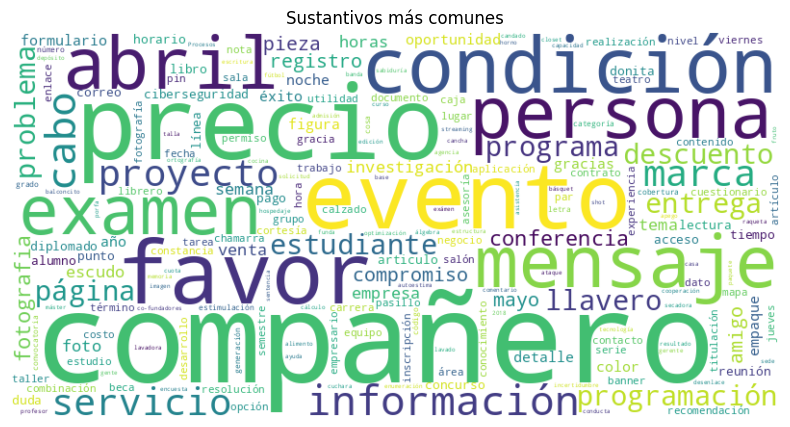

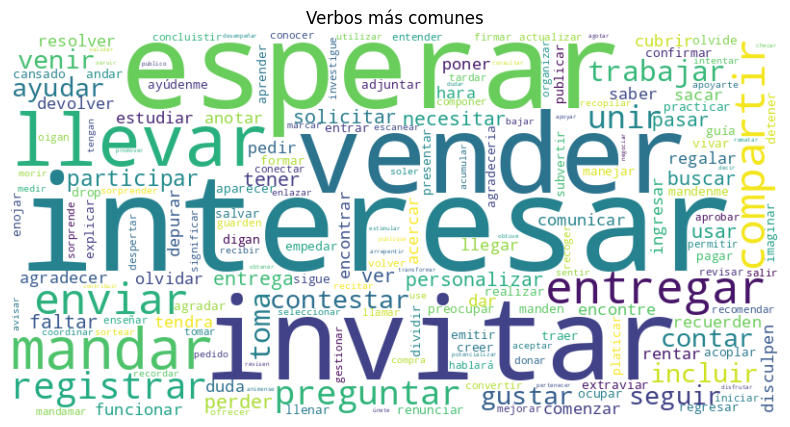

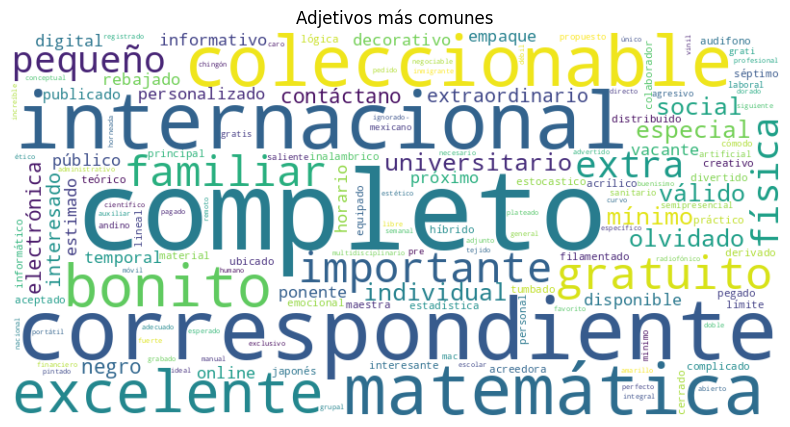

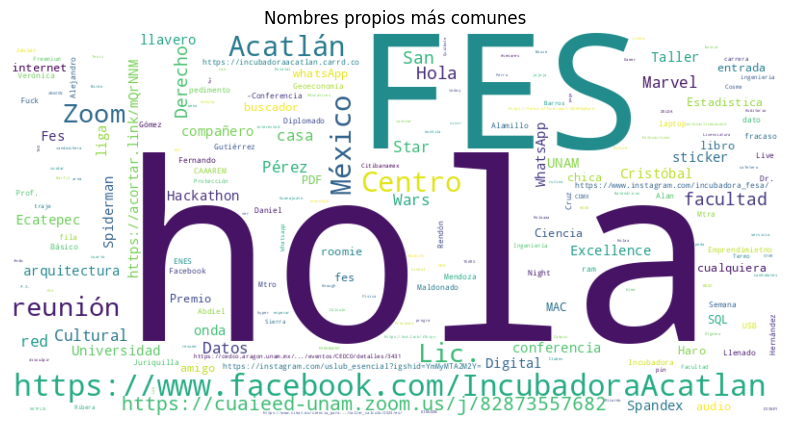

In [ ]:
# Dibuja las nubes de palabras para los sustantivos, verbos y adjetivos más comunes
graficarPalabras(sustantivos_comunes, "Sustantivos más comunes")
graficarPalabras(verbos_comunes, "Verbos más comunes")
graficarPalabras(adjetivos_comunes, "Adjetivos más comunes")